# 相关模块导入

In [39]:
from IPython.core.interactiveshell import InteractiveShell

import copy
import calendar
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 数据读取与总览

In [40]:
raw_data = pd.read_csv('data/train/train.csv')

In [41]:
raw_data.head()

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1


# 去除无需训练的列

In [42]:
raw_data.drop(['program_duration', 'program_type', 'id_num', 'program_id', 'test_id', 'trainee_id', 'age', 'total_programs_enrolled'], inplace=True, axis=1)

In [43]:
raw_data.head()

,test_type,difficulty_level,gender,education,city_tier,is_handicapped,trainee_engagement_rating,is_pass
0,offline,intermediate,M,Matriculation,3.0,N,1.0,0
1,offline,easy,F,High School Diploma,4.0,N,3.0,1
2,online,easy,M,Matriculation,1.0,N,2.0,1
3,offline,easy,F,Matriculation,3.0,N,1.0,1
4,offline,intermediate,F,High School Diploma,1.0,N,4.0,1


<AxesSubplot:>

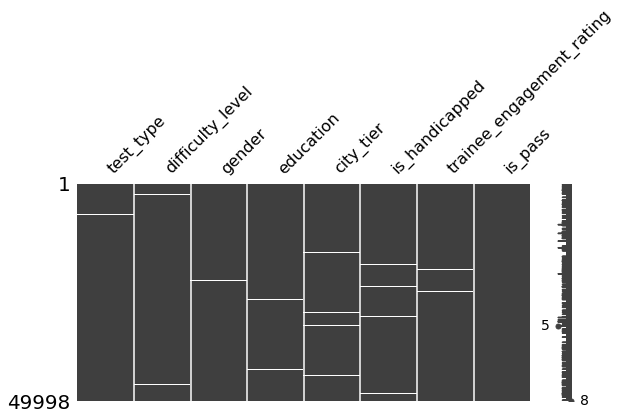

In [44]:
msno.matrix(raw_data, figsize=(9, 4))

In [45]:
raw_data.dropna(axis=0, how='any', inplace=True)

In [46]:
raw_data['is_pass'].value_counts()

1    31427
0    13784
Name: is_pass, dtype: int64

In [47]:
raw_data

,test_type,difficulty_level,gender,education,city_tier,is_handicapped,trainee_engagement_rating,is_pass
0,offline,intermediate,M,Matriculation,3.0,N,1.0,0
1,offline,easy,F,High School Diploma,4.0,N,3.0,1
2,online,easy,M,Matriculation,1.0,N,2.0,1
3,offline,easy,F,Matriculation,3.0,N,1.0,1
4,offline,intermediate,F,High School Diploma,1.0,N,4.0,1
...,...,...,...,...,...,...,...,...
49992,online,easy,F,Matriculation,4.0,N,1.0,1
49993,offline,hard,F,High School Diploma,2.0,N,4.0,1
49994,offline,intermediate,F,High School Diploma,3.0,N,3.0,1
49995,online,easy,F,High School Diploma,2.0,N,1.0,1


# 查看需编码列的唯一值

In [48]:
raw_data['test_type'].unique()
raw_data['difficulty_level'].unique()
raw_data['gender'].unique()
raw_data['education'].unique()
raw_data['is_handicapped'].unique()

array(['offline', 'online'], dtype=object)

array(['intermediate', 'easy', 'hard', 'vary hard'], dtype=object)

array(['M', 'F'], dtype=object)

array(['Matriculation', 'High School Diploma', 'Bachelors', 'Masters',
       'No Qualification'], dtype=object)

array(['N', 'Y'], dtype=object)

In [49]:
features_2_be_encoded = ['test_type', 'difficulty_level', 'gender', 'education', 'is_handicapped']

# 独热

In [50]:
raw_data = raw_data.join(pd.get_dummies(raw_data[["gender"]]))

# 去除独热后的列

In [51]:
raw_data.drop(['gender'], inplace=True, axis=1)

# 构造特征编码映射表

In [52]:
test_type_map = {'online': 0, 'offline': 1}
difficulty_level_map = {'easy': 1, 'intermediate': 2, 'hard': 3, 'vary hard': 4}
education_map = {'No Qualification': 1, 'High School Diploma': 2, 'Matriculation': 3, 'Bachelors': 4, 'Masters': 5}
is_handicapped_map = {'N': 0, 'Y': 1}

In [53]:
test_type_map
difficulty_level_map
education_map
is_handicapped_map

{'online': 0, 'offline': 1}

{'easy': 1, 'intermediate': 2, 'hard': 3, 'vary hard': 4}

{'No Qualification': 1,
 'High School Diploma': 2,
 'Matriculation': 3,
 'Bachelors': 4,
 'Masters': 5}

{'N': 0, 'Y': 1}

# 特征编码

In [54]:
raw_data['test_type'] = raw_data['test_type'].map(test_type_map)
raw_data['difficulty_level'] = raw_data['difficulty_level'].map(difficulty_level_map)
raw_data['education'] = raw_data['education'].map(education_map)
raw_data['is_handicapped'] = raw_data['is_handicapped'].map(is_handicapped_map)

In [55]:
encoded_data = copy.deepcopy(raw_data)

In [56]:
encoded_data

,test_type,difficulty_level,education,city_tier,is_handicapped,trainee_engagement_rating,is_pass,gender_F,gender_M
0,1,2,3,3.0,0,1.0,0,0,1
1,1,1,2,4.0,0,3.0,1,1,0
2,0,1,3,1.0,0,2.0,1,0,1
3,1,1,3,3.0,0,1.0,1,1,0
4,1,2,2,1.0,0,4.0,1,1,0
...,...,...,...,...,...,...,...,...,...
49992,0,1,3,4.0,0,1.0,1,1,0
49993,1,3,2,2.0,0,4.0,1,1,0
49994,1,2,2,3.0,0,3.0,1,1,0
49995,0,1,2,2.0,0,1.0,1,1,0


In [57]:
encoded_data.to_csv('data/after_EDA/EDA_data.csv', index=None)